<a href="https://colab.research.google.com/github/Maks12435/ML-projects/blob/main/Male_female_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_excel('/content/IDOLS.xlsx')
df.columns = [x[:len(x)//2] for x in df.columns]
df.columns

Index(['Stage', 'Full', 'Korean Name', 'K. Stage Name', 'Date of Birth',
       'Group', 'Country', 'Height', 'Weight', 'Birthplace', 'Gender'],
      dtype='object')

In [ ]:
df = df.drop(['Korean Name', 'K. Stage Name'], axis=1)
df = df[df['Height'] != 0]
df['Weight'] = df.groupby('Gender')['Weight'].transform(lambda x: x.replace(0, x[x != 0].mean()))
df['Gender'] = df['Gender'].map({'M': 1, 'F': 0})

Accuracy_test: 0.9696994818652921
Accuracy_train: 0.9924283246977564
Precision: 0.9695442838277734
Recall: 0.9661755561318164
F1: 0.9676412232800089
Fbeta: 0.9687300700499368


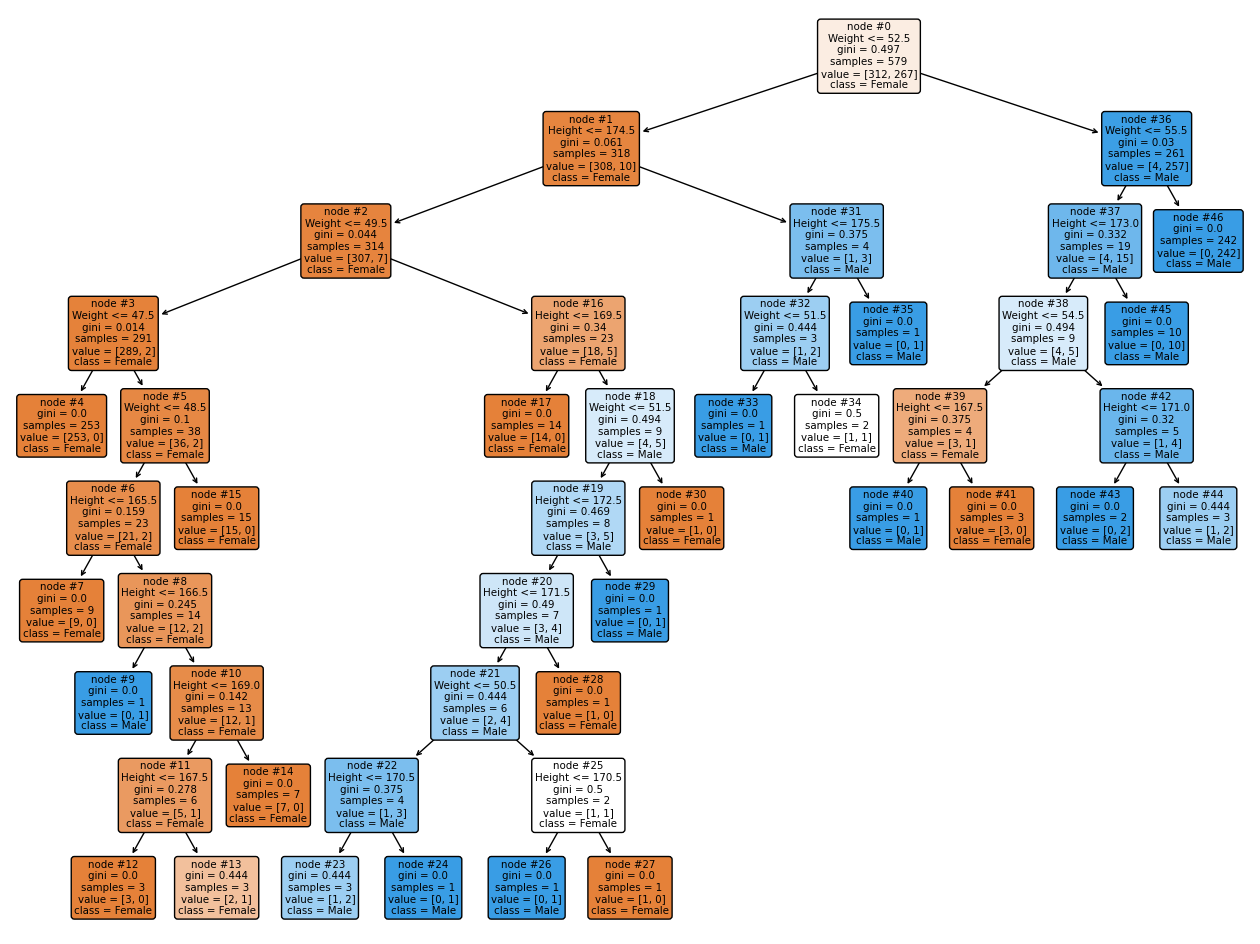

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, fbeta_score
import seaborn as sns
import matplotlib.pyplot as plt

X = df[['Height', 'Weight']]
y = df['Gender']

n = 500
accuracy = 0
accuracy1 = 0
precision = 0
recall = 0
f1 = 0
fbeta = 0
for i in range(n):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

  model = DecisionTreeClassifier()

  model.fit(X_train, y_train)

  y_pred_test = model.predict(X_test)
  y_pred_train = model.predict(X_train)

  accuracy += accuracy_score(y_test, y_pred_test)
  accuracy1 += accuracy_score(y_train, y_pred_train)
  precision += precision_score(y_test, y_pred_test)
  recall += recall_score(y_test, y_pred_test)
  f1 += f1_score(y_test, y_pred_test)
  fbeta += fbeta_score(y_test, y_pred_test, beta=0.5)

print(f'Accuracy_test: {accuracy/n}')
print(f'Accuracy_train: {accuracy1/n}')
print(f'Precision: {precision/n}')
print(f'Recall: {recall/n}')
print(f'F1: {f1/n}')
print(f'Fbeta: {fbeta/n}')

plt.figure(figsize=(16, 12))
plot_tree(model, feature_names=['Height', 'Weight'], class_names=['Female', 'Male'], filled=True, rounded=True, node_ids=True)
plt.show()

In [ ]:
n_nodes = model.tree_.node_count
children_left = model.tree_.children_left
children_right = model.tree_.children_right
feature = model.tree_.feature
threshold = model.tree_.threshold
print(n_nodes)
print(children_left)
print(children_right)
print(feature)
print(threshold)

47
[ 1  2  3  4 -1  6  7 -1  9 -1 11 12 -1 -1 -1 -1 17 -1 19 20 21 22 23 -1
 -1 26 -1 -1 -1 -1 -1 32 33 -1 -1 -1 37 38 39 40 -1 -1 43 -1 -1 -1 -1]
[36 31 16  5 -1 15  8 -1 10 -1 14 13 -1 -1 -1 -1 18 -1 30 29 28 25 24 -1
 -1 27 -1 -1 -1 -1 -1 35 34 -1 -1 -1 46 45 42 41 -1 -1 44 -1 -1 -1 -1]
[ 1  0  1  1 -2  1  0 -2  0 -2  0  0 -2 -2 -2 -2  0 -2  1  0  0  1  0 -2
 -2  0 -2 -2 -2 -2 -2  0  1 -2 -2 -2  1  0  1  0 -2 -2  0 -2 -2 -2 -2]
[ 52.5 174.5  49.5  47.5  -2.   48.5 165.5  -2.  166.5  -2.  169.  167.5
  -2.   -2.   -2.   -2.  169.5  -2.   51.5 172.5 171.5  50.5 170.5  -2.
  -2.  170.5  -2.   -2.   -2.   -2.   -2.  175.5  51.5  -2.   -2.   -2.
  55.5 173.   54.5 167.5  -2.   -2.  171.   -2.   -2.   -2.   -2. ]


In [ ]:
from sklearn.tree import export_text

tree_text = export_text(model, feature_names=['Height', 'Weight'])
print(tree_text)

|--- Weight <= 52.50
|   |--- Weight <= 49.50
|   |   |--- Weight <= 47.50
|   |   |   |--- class: 0
|   |   |--- Weight >  47.50
|   |   |   |--- Height <= 166.50
|   |   |   |   |--- Height <= 165.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Height >  165.50
|   |   |   |   |   |--- Weight <= 48.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Weight >  48.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- Height >  166.50
|   |   |   |   |--- class: 0
|   |--- Weight >  49.50
|   |   |--- Height <= 169.50
|   |   |   |--- Weight <= 50.50
|   |   |   |   |--- class: 0
|   |   |   |--- Weight >  50.50
|   |   |   |   |--- Height <= 167.50
|   |   |   |   |   |--- Weight <= 51.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Weight >  51.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- Height >  167.50
|   |   |   |   |   |--- class: 0
|   |   |--- Height >  169.50
|   |   |   |--- Height <= 175.50
|   |   |   |   |--- 

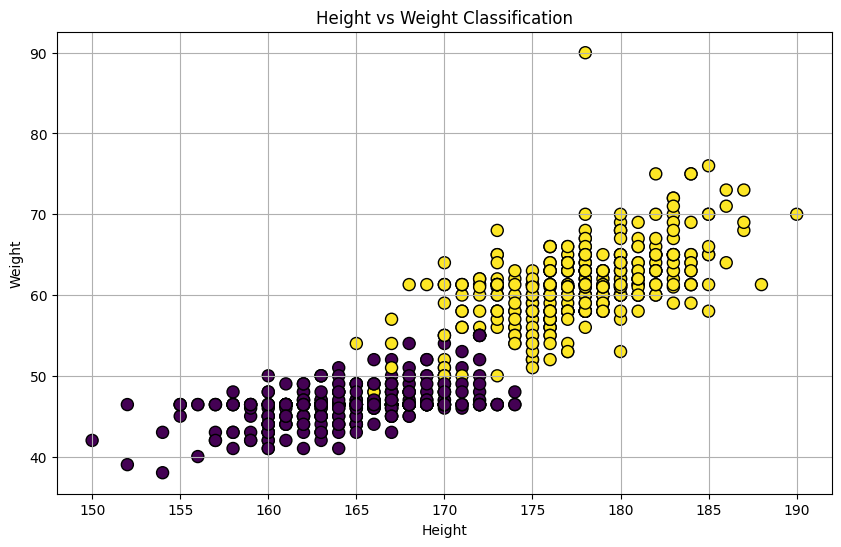

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Height'], df['Weight'], c=df['Gender'], edgecolors='k', s=75)
plt.title('Height vs Weight Classification')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.grid(True)
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential((
    Dense(16, activation='relu', input_dim=2),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, batch_size=32)
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')
pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4618 - loss: 35.9499
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4583 - loss: 28.0507
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4396 - loss: 21.4215  
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4642 - loss: 13.6462
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4528 - loss: 7.0664
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5079 - loss: 0.9877
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5642 - loss: 0.6426 
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6587 - loss: 0.5919 
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6889 - loss: 0.5741 
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8204 - loss: 0.5530 
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8140 - loss: 0.5384 
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

In [ ]:
X_test

,Height,Weight
980,184,63.000000
71,169,46.436019
1565,158,46.436019
444,171,60.000000
576,166,47.000000
...,...,...
93,162,46.436019
1479,180,63.000000
1500,150,42.000000
1114,175,61.291667


In [ ]:
prob = pred.reshape(-1)
pred = np.where(pred > 0.5, 1, 0)
pred = pred.reshape(-1)
pred

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
df1 = pd.DataFrame({'Actual': y_test.values, 'Predicted': pred, 'Probability': prob})
df1 = df1[df1['Actual'] != df1['Predicted']]
df1

,Actual,Predicted,Probability
33,1,0,0.393811
51,0,1,0.520584
140,1,0,0.405122
158,1,0,0.277063


In [ ]:
merger_df = pd.merge(df1, X_test, how="inner",  left_index=True, right_index=True)
merger_df

,Actual,Predicted,Probability,Height,Weight
158,1,0,0.277063,162,44.0


In [ ]:
df.describe()

,Height,Weight,Gender
count,772.000000,772.000000,772.000000
mean,170.770725,53.421252,0.470207
std,7.674846,8.247811,0.499435
min,150.000000,38.000000,0.000000
25%,165.000000,46.436019,0.000000
50%,170.000000,50.000000,0.000000
75%,177.000000,61.291667,1.000000
max,190.000000,90.000000,1.000000
